In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('RioTomatlan.TXT', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
#df0 es como definimos lo que vamos a leer
#
# Lee los primeros 5 renglones del archivo
#
#head() es un comando que imprime lo que quieras del documento que tienes, si no escribes ningún número en
#paréntesis, te imprime por default las primeras 5 líneas.
#
df0.head(10)
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,25/01/2018,23:00,0,236,0.00,0.0,26.2,71,995.9,0.0,126.2
1,26/01/2018,00:00,0,305,0.00,0.0,26.0,71,996.0,0.0,37.8
2,26/01/2018,01:00,0,343,0.00,0.0,25.2,74,996.4,0.0,0.0
3,26/01/2018,02:00,0,320,0.00,0.0,24.1,77,996.9,0.0,0.0
4,26/01/2018,03:00,44,53,3.34,18.9,23.8,78,997.5,0.0,0.0
5,26/01/2018,04:00,36,45,5.50,17.7,23.1,80,998.0,0.0,0.0
6,26/01/2018,05:00,14,30,5.63,16.4,22.9,81,997.9,0.0,0.0
7,26/01/2018,06:00,359,356,4.30,16.5,22.6,81,997.7,0.0,0.0
8,26/01/2018,07:00,325,25,1.02,15.3,22.5,81,997.3,0.0,0.0
9,26/01/2018,08:00,0,65,0.00,0.0,22.1,82,996.7,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,0,236,0.00,0.0,26.2,71,995.9,0.0,126.2,2018-01-25 23:00:00
1,0,305,0.00,0.0,26.0,71,996.0,0.0,37.8,2018-01-26 00:00:00
2,0,343,0.00,0.0,25.2,74,996.4,0.0,0.0,2018-01-26 01:00:00
3,0,320,0.00,0.0,24.1,77,996.9,0.0,0.0,2018-01-26 02:00:00
4,44,53,3.34,18.9,23.8,78,997.5,0.0,0.0,2018-01-26 03:00:00


In [8]:
df.dtypes

DIRS               int64
DIRR               int64
VELS             float64
VELR             float64
TEMP             float64
HR                 int64
PB               float64
PREC             float64
RADSOL           float64
FECHA     datetime64[ns]
dtype: object

In [9]:
# Realiza un análisis exploratorio de datos
#Esto significa que te ofrece una tabla donde te dice cuántos datos son, así como la media, estándar, mínima, primer,
#segundo y tercer cuartil, y el valor máximo de cada columna con datos que tengas.
#
#estándar = 
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,63.855422,132.313253,2.120120,9.581325,24.341566,67.126506,995.149398,0.007831,151.630723
std,92.968373,110.986642,3.278106,9.389966,3.218491,13.642701,1.836688,0.073022,240.910038
min,0.000000,1.000000,0.000000,0.000000,19.400000,33.000000,991.200000,0.000000,0.000000
25%,0.000000,49.000000,0.000000,0.000000,21.900000,58.000000,993.800000,0.000000,0.000000
50%,32.000000,71.500000,0.070000,11.050000,23.850000,70.000000,995.100000,0.000000,0.100000
75%,65.000000,186.750000,3.505000,16.475000,26.100000,78.750000,996.550000,0.000000,207.525000
max,359.000000,356.000000,17.470000,35.700000,32.900000,87.000000,999.200000,0.800000,835.000000


In [10]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
3,0,320,0.00,0.0,24.1,77,996.9,0.0,0.0,2018-01-26 02:00:00
28,0,65,0.00,1.6,24.7,52,995.0,0.0,0.0,2018-01-27 03:00:00
29,353,351,0.03,7.7,24.5,56,995.2,0.0,0.0,2018-01-27 04:00:00
42,0,7,0.00,0.0,24.4,73,995.4,0.0,712.0,2018-01-27 17:00:00
75,179,187,4.40,16.7,24.9,58,994.5,0.0,0.0,2018-01-29 02:00:00
90,0,32,0.00,4.6,24.6,79,995.1,0.0,451.2,2018-01-29 17:00:00
100,41,58,1.89,16.0,24.9,68,995.2,0.0,0.0,2018-01-30 03:00:00
101,49,62,3.51,17.3,24.3,72,995.3,0.0,0.0,2018-01-30 04:00:00
108,43,31,10.34,22.2,24.5,59,992.4,0.0,0.0,2018-01-30 11:00:00
114,37,75,0.05,11.3,24.7,54,996.4,0.0,187.3,2018-01-30 17:00:00


In [11]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       63.855422
DIRR      132.313253
VELS        2.120120
VELR        9.581325
TEMP       24.341566
HR         67.126506
PB        995.149398
PREC        0.007831
RADSOL    151.630723
dtype: float64

In [12]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

24.341566265060244

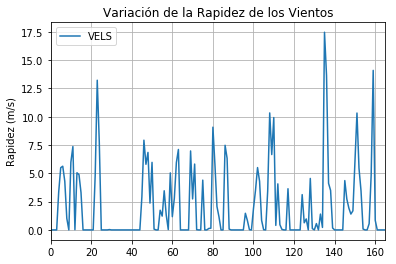

In [13]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

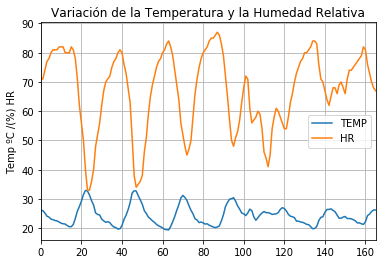

In [14]:
# Gráfica de Temperatura y Humedad Relativa
#
#con "df[['TEMP','HR']]" estamos simplemente graficando todos los datos en la columna de Temperatura y Hora.
#
#Entonces "figure" crea la figura, y df1.plot está llamando a la etiqueta (la cual es df1) para graficarlo, mientras que
#legend(loc='best') pone las leyendas en el sitio que considere mejor.
#
#En esta gráfica no declaramos la cantidad de número de datos que le voy a meter.
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

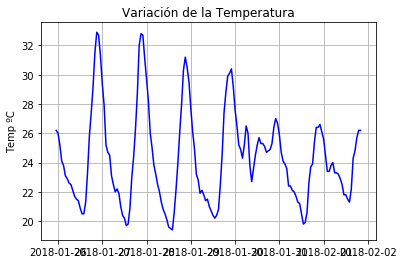

In [15]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

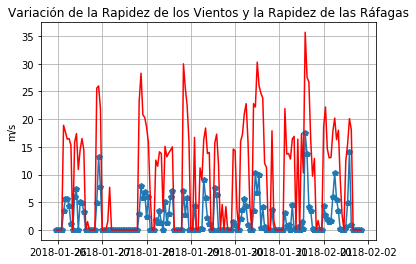

In [16]:
#Aquí empezamos con las gráficas adicionales.
#
#Gráfica de a rapidez de los vientos y la rapidez de las ráfagas
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="p-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-")
plt.title("Variación de la Rapidez de los Vientos y la Rapidez de las Ráfagas")
plt.ylabel("m/s")
plt.grid(True)
plt.show()

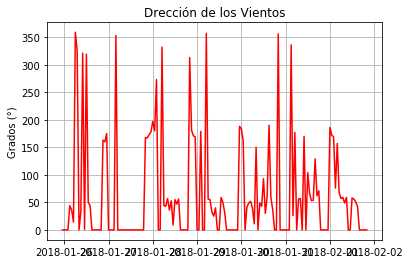

In [17]:
#Gráfica de los vientos dominantes.
#
#"x=" y "Y=" sirven para decir la cantidad de datos que le voy a meter a la gráfica.
#
#plt.x/ylabel sirve para específicar qué son los números en los ejes.
#
#grid muestra las líneas de atrás (los rectángulos)
#
#Si no pones el comando "plt.show()", la celda te calculará la gráfica, pero no la mostrará.
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="r")
plt.title("Drección de los Vientos")
plt.ylabel("Grados (°)")
plt.grid(True)
plt.show()

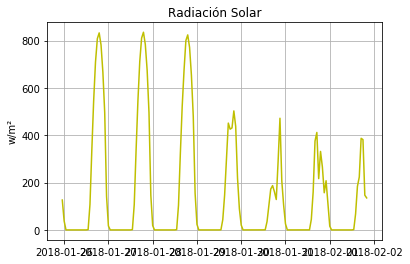

In [18]:
#Cuando quiero mostrar cierto día o cierta hora y no todo en la gráfica, usamos la función "xlim" (busca más en internet
#para eso, el profe no quiso dar más info :"v)
#
#Gráfica de Radiación Solar en función del Tiempo
#
#Cuando se refiere "a base del tiempo" significa que el tiempo (segundos, hora, día; la fecha en general), tomará el eje 
#"X", mientras que lo que te pide que esté en base al tiempo tomará el eje "y".
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="y-")
plt.title("Radiación Solar")
plt.ylabel("w/m²")
plt.grid(True)
plt.show()

In [19]:
#Lapso (diferencia) de Temperatura Máxima y Mínima
#
df.TEMP.max() - df.TEMP.min() 


13.5

In [20]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,63.855422,132.313253,2.120120,9.581325,24.341566,67.126506,995.149398,0.007831,151.630723
std,92.968373,110.986642,3.278106,9.389966,3.218491,13.642701,1.836688,0.073022,240.910038
min,0.000000,1.000000,0.000000,0.000000,19.400000,33.000000,991.200000,0.000000,0.000000
25%,0.000000,49.000000,0.000000,0.000000,21.900000,58.000000,993.800000,0.000000,0.000000
50%,32.000000,71.500000,0.070000,11.050000,23.850000,70.000000,995.100000,0.000000,0.100000
75%,65.000000,186.750000,3.505000,16.475000,26.100000,78.750000,996.550000,0.000000,207.525000
max,359.000000,356.000000,17.470000,35.700000,32.900000,87.000000,999.200000,0.800000,835.000000
